**OpenViSUS: read from a remote dataset**



In [1]:
import os,sys

# Here are commands to install a package (OpenVisus) directly from a jupyter notebook
# after you install those once you can comment those comment
# !{sys.executable} -m pip install numpy matplotlib ipyvolume OpenVisus

In [2]:
import os,sys
import matplotlib.pyplot as plt
import numpy

def ShowData(data):
    fig = plt.figure(figsize = (70,20))
    ax = fig.add_subplot(1,1,1)
    ax.imshow(data, origin='lower')
    plt.show()

In [3]:
from OpenVisus import *
db=LoadDataset("http://atlantis.sci.utah.edu/mod_visus?dataset=2kbit1")
print(db.getDatasetBody().toString())

Starting OpenVisus c:\python38\lib\site-packages\OpenVisus\__init__.py 3.8.6 (tags/v3.8.6:db45529, Sep 23 2020, 15:52:53) [MSC v.1927 64 bit (AMD64)] sys.version_info(major=3, minor=8, micro=6, releaselevel='final', serial=0) ...
<dataset url="http://atlantis.sci.utah.edu/mod_visus?dataset=2kbit1" typename="IdxDataset">
	<idxfile>
		<version value="6" />
		<bitmask value="V012012012012012012012012012012012" />
		<box value="0 2048 0 2048 0 2048" />
		<bitsperblock value="16" />
		<blocksperfile value="256" />
		<block_interleaving value="0" />
		<filename_template value="./visus/%02x/%04x.bin" />
		<missing_blocks value="False" />
		<time_template value="" />
		<field name="DATA" description="" index="" default_compression="zip" default_layout="hzorder" default_value="0" filter="" dtype="uint8" />
		<timestep when="0" />
	</idxfile>
</dataset>


shape (128, 256, 256) dtype uint8


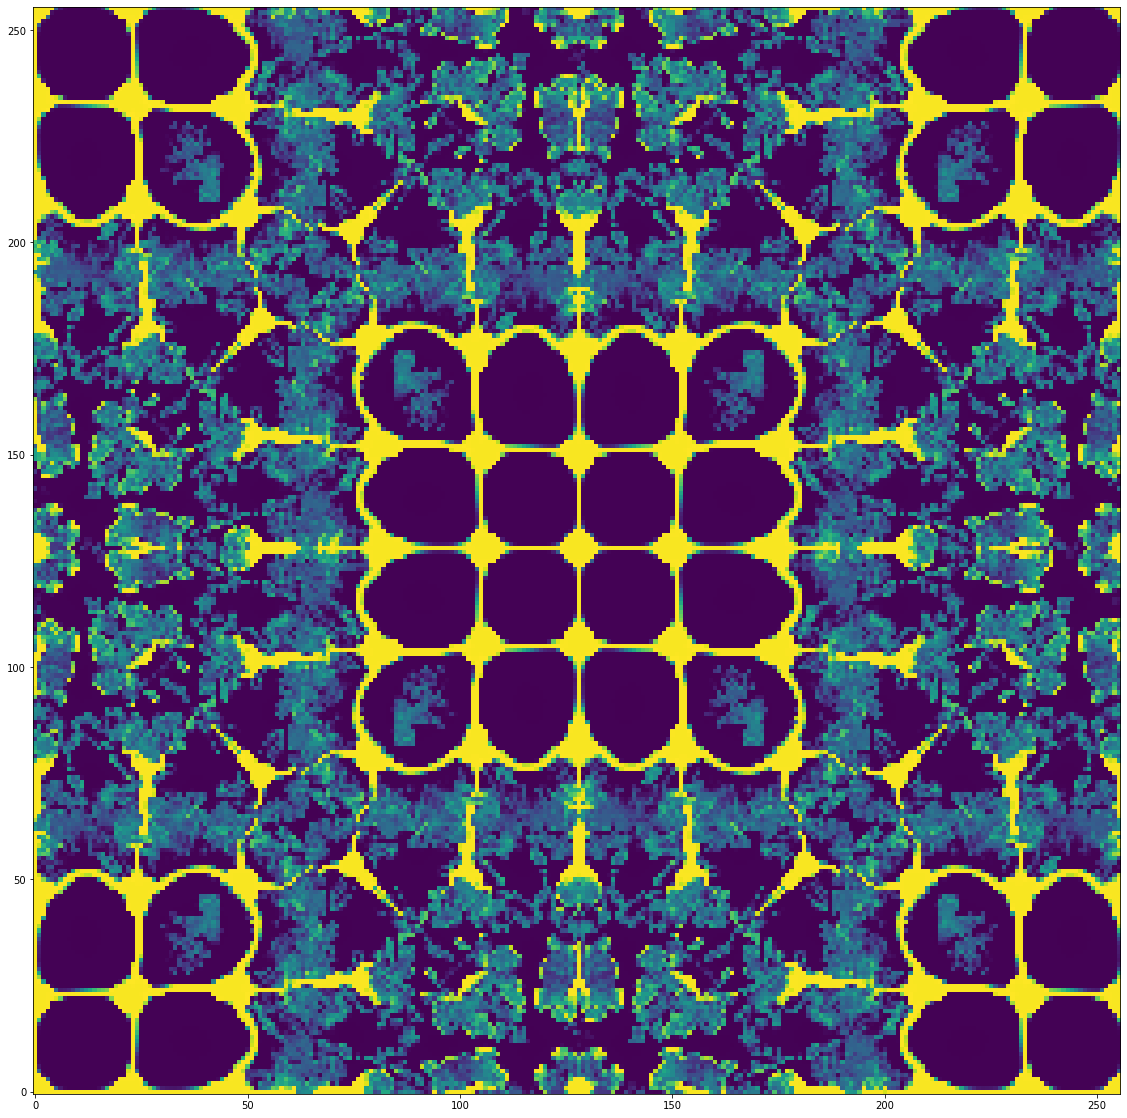

In [4]:
max_resolution=24
logic_box=db.getLogicBox(x=[0,2048],y=[0,2048],z=[1024,2048])
data=db.read(logic_box=logic_box,max_resolution=max_resolution)
print("shape",data.shape,"dtype",data.dtype)

# show first slice
ShowData(data[0,:,:]) 

**Test 2D plot**

Making a 3D query for volume rendering

In [5]:
data=db.read(logic_box=logic_box, max_resolution=max_resolution)
print("shape",data.shape,"dtype",data.dtype)

shape (128, 256, 256) dtype uint8


**Test volume rendering with iPyVolume**

In [6]:
import ipyvolume
ipyvolume.quickvolshow(data, level=[0.25, 0.75], opacity=0.03, level_width=0.1,  data_min=0,  data_max=255)

c:\python38\lib\site-packages\ipyvolume\serialize.py:81: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0]**2 + gradient[1]**2 + gradient[2]**2)
